# Animal Crosing New Horizons Data Analysis

ACNH is the latest installment of the Animal Crossing franchise by Nintendo released in March of 2020; it's a "life simulation" game whereby a character can build and create a home on an island filled with animals all having various personalities! There's no right way of playing this game as there's a load of options for interactions with the various villagers that will eventually move onto and off of the players' island, as well as customization options for the player's own house. There's also the possibility of having more bells (the in game currency) than imaginable!

Kaggle.com has a dataset made of 30 tables about this game, containing information ranging from villages to items broken down by category. 

Given some of these datasets I'd like to find some insights regarding the villagers and the economy of the island.


1. What's the distribution of genders across the villagers?
    * What are their potential personality types?
    * What are the species of the villagers?
    * What are their hobbies?
2. What is the highest selling item the player can find that can be sold?
3. What items can be DIY?
    *Is it profitable to DIY items that can be bought in Nook's Cranny (the island's store) or from Tom Nook (the island's manager)?
4. Where do the bulk of DIY recipe cards come from?
5. What materials are most DIY recipes made from?

In [1]:
# First import the libaries that will be used throughout the project

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# The datasets need to be loaded in using pandas

villagers = pd.read_csv('villagers.csv')
diy_recipes = pd.read_csv('recipes.csv')
fish = pd.read_csv('fish.csv')
insects = pd.read_csv('insects.csv')
fossils = pd.read_csv('fossils.csv')

In [3]:
# There's also multiple .csv files that would be nice to have in one single dataframe

list_of_csv_files = ['accessories.csv', 'bags.csv', 'bottoms.csv', 'dress-up.csv', 'floors.csv', 'fencing.csv',
    'headwear.csv', 'housewares.csv', 'miscellaneous.csv', 'other.csv', 'rugs.csv', 'shoes.csv', 'tops.csv', 
    'tools.csv', 'umbrellas.csv', 'wall-mounted.csv', 'wallpaper.csv']

dataframes = []

for filename in list_of_csv_files:
    dataframes.append(pd.read_csv(filename))

store_items = pd.concat(dataframes)


In [4]:
# Let's examine the dataframes

villagers.info()
villagers.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [5]:
diy_recipes.info()
diy_recipes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               595 non-null    object 
 1   #1                 595 non-null    int64  
 2   Material 1         595 non-null    object 
 3   #2                 325 non-null    float64
 4   Material 2         325 non-null    object 
 5   #3                 120 non-null    float64
 6   Material 3         120 non-null    object 
 7   #4                 50 non-null     float64
 8   Material 4         50 non-null     object 
 9   #5                 27 non-null     float64
 10  Material 5         27 non-null     object 
 11  #6                 18 non-null     float64
 12  Material 6         18 non-null     object 
 13  Buy                595 non-null    object 
 14  Sell               595 non-null    int64  
 15  Miles Price        29 non-null     float64
 16  Source             595 non

,Name,#1,Material 1,#2,Material 2,#3,Material 3,#4,Material 4,#5,...,Sell,Miles Price,Source,Source Notes,Recipes to Unlock,Version,Category,Serial ID,Internal ID,Unique Entry ID
0,acorn pochette,6,acorn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Balloons,Only available during Fall,0,1.0.0,Bags,2982,632,a9FFbP64fTcJ3Cn5E
1,acoustic guitar,8,softwood,3.0,iron nugget,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Smug villagers,NaN,0,1.0.0,Housewares,406,44,Y62RymJYgbmZEyQon
2,angled signpost,2,hardwood,3.0,softwood,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Lazy villagers,NaN,100,1.0.0,Housewares,440,510,BNiDaivRjGNzCckWw
3,apple chair,10,apple,4.0,wood,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Big Sister villagers,NaN,100,1.0.0,Housewares,1700,189,HB55bMQf4D57ekNf4
4,apple dress,8,apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Big Sister villagers,NaN,100,1.0.0,Dresses,1782,621,KmfTvhh3qeyd6WcFJ


In [6]:
fish.info()
fish.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        80 non-null     int64 
 1   Name                     80 non-null     object
 2   Sell                     80 non-null     int64 
 3   Where/How                80 non-null     object
 4   Shadow                   80 non-null     object
 5   Total Catches to Unlock  80 non-null     int64 
 6   Spawn Rates              80 non-null     object
 7   Rain/Snow Catch Up       80 non-null     object
 8   NH Jan                   31 non-null     object
 9   NH Feb                   31 non-null     object
 10  NH Mar                   35 non-null     object
 11  NH Apr                   39 non-null     object
 12  NH May                   44 non-null     object
 13  NH Jun                   55 non-null     object
 14  NH Jul                   58 non-null     obj

,#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,NH Jan,NH Feb,...,SH Dec,Color 1,Color 2,Size,Lighting Type,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
0,56,anchovy,200,Sea,Small,0,2–5,No,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,Blue,Red,1x1,No lighting,Fish81,FishAntyobi,FtrFishAntyobi,4201,LzuWkSQP55uEpRCP5
1,36,angelfish,3000,River,Small,20,2–5,No,NaN,NaN,...,4 PM – 9 AM,Yellow,Black,1x1,Fluorescent,Fish30,FishAngelfish,FtrFishAngelfish,2247,XTCFCk2SiuY5YXLZ7
2,44,arapaima,10000,River,XX-Large,50,1,Yes,NaN,NaN,...,4 PM – 9 AM,Black,Blue,3x2,No lighting,Fish36,FishPiraruku,FtrFishPiraruku,2253,mZy4BES54bqwi97br
3,41,arowana,10000,River,Large,50,1–2,No,NaN,NaN,...,4 PM – 9 AM,Yellow,Black,2x1,Fluorescent,Fish33,FishArowana,FtrFishArowana,2250,F68AvCaqddBJL7ZSN
4,58,barred knifejaw,5000,Sea,Medium,20,3–5,No,NaN,NaN,...,All day,White,Black,1x1,Fluorescent,Fish47,FishIshidai,FtrFishIshidai,2265,X3R9SFSAaDzBF4fE3


In [7]:
insects.info()
insects.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        80 non-null     int64 
 1   Name                     80 non-null     object
 2   Sell                     80 non-null     int64 
 3   Where/How                80 non-null     object
 4   Weather                  80 non-null     object
 5   Total Catches to Unlock  80 non-null     int64 
 6   Spawn Rates              80 non-null     object
 7   NH Jan                   20 non-null     object
 8   NH Feb                   21 non-null     object
 9   NH Mar                   27 non-null     object
 10  NH Apr                   36 non-null     object
 11  NH May                   43 non-null     object
 12  NH Jun                   48 non-null     object
 13  NH Jul                   61 non-null     object
 14  NH Aug                   63 non-null     obj

,#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,...,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,NaN,NaN,NaN,...,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2
1,69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,...,All day,All day,All day,Black,White,Ins26,InsectAri,FtrInsectAri,588,QZpmczZu4hW2a4Rpv
2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5,NaN,NaN,NaN,...,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow,Ins10,InsectYonagunisan,FtrInsectYonagunisan,652,u2GhYQJXDCQKp7AQ8
3,68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50,All day,All day,All day,...,All day,All day,All day,Brown,Blue,Ins36,InsectMinomushi,FtrInsectMinomushi,622,QvxgCm82JqHsDknY4
4,34,banded dragonfly,4500,Flying near water,Any except rain,50,7,NaN,NaN,NaN,...,NaN,8 AM – 5 PM,8 AM – 5 PM,Black,Yellow,Ins24,InsectOniyanma,FtrInsectOniyanma,635,pCFep58D6QusMSvR7


In [8]:
fossils.info()
fossils.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             73 non-null     object
 1   Buy              73 non-null     object
 2   Sell             73 non-null     int64 
 3   Color 1          73 non-null     object
 4   Color 2          73 non-null     object
 5   Size             73 non-null     object
 6   Source           73 non-null     object
 7   Museum           73 non-null     object
 8   Version          73 non-null     object
 9   Interact         73 non-null     object
 10  Catalog          73 non-null     object
 11  Filename         73 non-null     object
 12  Internal ID      73 non-null     int64 
 13  Unique Entry ID  73 non-null     object
dtypes: int64(2), object(12)
memory usage: 8.1+ KB


,Name,Buy,Sell,Color 1,Color 2,Size,Source,Museum,Version,Interact,Catalog,Filename,Internal ID,Unique Entry ID
0,acanthostega,NFS,2000,Beige,Brown,1x1,Assessing fossils,Room 1,1.0.0,No,Not for sale,FtrFossilFirstFourLegs,4664,LQkRP3kBn3T2jBboF
1,amber,NFS,1200,Yellow,Yellow,1x1,Assessing fossils,Room 1,1.0.0,No,Not for sale,FtrFossilAmber,294,ANAhATcHWvAGEhRnt
2,ammonite,NFS,1100,Beige,Brown,1x1,Assessing fossils,Room 1,1.0.0,No,Not for sale,FtrFossilAmmonoidea,295,ojNKnr4YRrmPi2gPo
3,ankylo skull,NFS,3500,Brown,Brown,2x2,Assessing fossils,Room 2,1.0.0,No,Not for sale,FtrFossilAnkylosaurusA,169,QQjxKmQ8Aac9cSoM2
4,ankylo tail,NFS,2500,Brown,Brown,2x2,Assessing fossils,Room 2,1.0.0,No,Not for sale,FtrFossilAnkylosaurusC,171,wLWBm2R727RC3qSL2


In [9]:
store_items.info()
store_items.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 246
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   10464 non-null  object 
 1   Variation              8838 non-null   object 
 2   DIY                    10464 non-null  object 
 3   Buy                    10464 non-null  object 
 4   Sell                   10393 non-null  float64
 5   Color 1                10411 non-null  object 
 6   Color 2                10411 non-null  object 
 7   Size                   9669 non-null   object 
 8   Miles Price            154 non-null    float64
 9   Source                 10417 non-null  object 
 10  Source Notes           7105 non-null   object 
 11  Seasonal Availability  4230 non-null   object 
 12  Mannequin Piece        4134 non-null   object 
 13  Version                10464 non-null  object 
 14  Style                  4230 non-null   object 
 15  Labe

,Name,Variation,DIY,Buy,Sell,Color 1,Color 2,Size,Miles Price,Source,...,Uses,Set,Door Deco,VFX Type,Window Type,Window Color,Pane Type,Curtain Type,Curtain Color,Ceiling Type
0,3D glasses,White,No,490,122.0,White,Colorful,1x1,NaN,Able Sisters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3D glasses,Black,No,490,122.0,Black,Colorful,1x1,NaN,Able Sisters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bandage,Beige,No,140,35.0,Beige,White,1x1,NaN,Able Sisters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,beak,Yellow,No,490,122.0,Yellow,Yellow,1x1,NaN,Able Sisters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,birthday shades,Yellow,No,NFS,620.0,Yellow,Red,1x1,NaN,Birthday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

We can now see that there's a lot of extra data included in these dataframes! We could probably do well with dropping columns from them that we won't be using such as "Filename", "Internal ID", "Unique Entry ID" and anything else that's been assigned internally for the game to keep track of assests. 

It's also apparent that there a lot of NaN entries on our diy_recipes dataframe. Those can be dropped as well for ease later if we wanted to see which materials make up the bulk of the diy recipes that are found. 

In [10]:
# We'll start by dropping unneeded columns from our dataframes. 

villagers = villagers.drop(axis = 1, columns=['Wallpaper', 'Flooring', 'Furniture List', 'Filename', 'Unique Entry ID'])

villagers.rename(columns={'Name': 'Name', 'Species': 'Species', 'Gender': 'Gender', 
    'Personality': 'Personality', 'Hobby': 'Hobby', 'Birthday': 'Birthday', 'Catchphrase': 'Catchphrase',
    'Favorite Song': 'Song', 'Style 1': 'First_style', 'Style 2': 'Second_style', 
    'Color 1': 'First_color', 'Color 2': 'Second_color'}, inplace=True)

villagers.head()


,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Song,First_style,Second_style,First_color,Second_color
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue


In [11]:
diy_recipes = diy_recipes.drop(axis= 1, columns=['#1', '#2', '#3', '#4', '#5', '#6','Unique Entry ID', 'Internal ID', 'Serial ID', 'Version', 'Source Notes', 'Recipes to Unlock'])

diy_recipes.rename(columns={'Name': 'Name', 'Material 1': 'Mat_1', 'Material 2': 'Mat_2', 
    'Material 3': 'Mat_3', 'Material 4': 'Mat_4', 'Material 5': 'Mat_5', 'Material 6': 'Mat_6',
    'Buy': 'Buy_price', 'Sell': 'Sell_price', 'Miles Price': 'Miles_price', 'Source': 'Source', 'Category': 'Category'},
    inplace=True)

diy_recipes.head()

,Name,Mat_1,Mat_2,Mat_3,Mat_4,Mat_5,Mat_6,Buy_price,Sell_price,Miles_price,Source,Category
0,acorn pochette,acorn,NaN,NaN,NaN,NaN,NaN,NFS,200,NaN,Balloons,Bags
1,acoustic guitar,softwood,iron nugget,NaN,NaN,NaN,NaN,NFS,200,NaN,Smug villagers,Housewares
2,angled signpost,hardwood,softwood,NaN,NaN,NaN,NaN,NFS,200,NaN,Lazy villagers,Housewares
3,apple chair,apple,wood,NaN,NaN,NaN,NaN,NFS,200,NaN,Big Sister villagers,Housewares
4,apple dress,apple,NaN,NaN,NaN,NaN,NaN,NFS,200,NaN,Big Sister villagers,Dresses


In [12]:
diy_recipes = diy_recipes.fillna(0)

diy_recipes.head()

,Name,Mat_1,Mat_2,Mat_3,Mat_4,Mat_5,Mat_6,Buy_price,Sell_price,Miles_price,Source,Category
0,acorn pochette,acorn,0,0,0,0,0,NFS,200,0.0,Balloons,Bags
1,acoustic guitar,softwood,iron nugget,0,0,0,0,NFS,200,0.0,Smug villagers,Housewares
2,angled signpost,hardwood,softwood,0,0,0,0,NFS,200,0.0,Lazy villagers,Housewares
3,apple chair,apple,wood,0,0,0,0,NFS,200,0.0,Big Sister villagers,Housewares
4,apple dress,apple,0,0,0,0,0,NFS,200,0.0,Big Sister villagers,Dresses


In [13]:
# We can create a new table out of just the materials used in Diy recipes for future analysis here if we'd like

diy_materials = diy_recipes[diy_recipes.columns[0:7]].copy()

diy_materials.head()

,Name,Mat_1,Mat_2,Mat_3,Mat_4,Mat_5,Mat_6
0,acorn pochette,acorn,0,0,0,0,0
1,acoustic guitar,softwood,iron nugget,0,0,0,0
2,angled signpost,hardwood,softwood,0,0,0,0
3,apple chair,apple,wood,0,0,0,0
4,apple dress,apple,0,0,0,0,0


In [42]:
# The diy_materials dataframe contains a count for each time an item appears as a material, spread across six columns. 
# By using .apply and pd.value_counts we can get the count of each item across those columns and cast them to integers 
# using astype(int).
materials = diy_materials[['Mat_1', 'Mat_2', 'Mat_3', 'Mat_4', 'Mat_5', 'Mat_6']]\
    .apply(pd.value_counts).fillna(0).astype(int).reset_index()

# Using .sum with a specified axis of 1 for columns, we can then create a Series containing the total number of times
# each item appears in the dataframe.
count = materials[['Mat_1', 'Mat_2', 'Mat_3', 'Mat_4', 'Mat_5', 'Mat_6']].sum(axis=1)

# We can then assign a column containing each value to the dataframe with a name 
materials = materials.assign(Total=count)

# We can then drop the columns that contain each separate appearance of the item since we have a running total, 
# as well as a row which contains the total amount for previously replace NaN values of 0.
mat_counts = materials.drop(columns=['Mat_1', 'Mat_2', 'Mat_3', 'Mat_4', 'Mat_5', 'Mat_6'], axis=1)\
    .drop(materials.index[126])

# Rename our columns
mat_counts.rename(columns={'index': 'Item', 'Total': 'Total'}, inplace=True)

# Sort our table by highest appearance
mat_counts = mat_counts.sort_values(by='Total', ascending=False)

mat_counts.head()

,Item,Total
34,iron nugget,101
76,wood,95
66,star fragment,53
65,softwood,49
33,hardwood,49


In [15]:
fish = fish.drop(axis=1, columns=fish.columns[8:41])

fish.rename(columns={'#': 'ID_num', 'Name': 'Name', 'Sell': 'Sell_price', 'Where/How': 'Location',
    'Shadow': 'Appearance', 'Total Catches to Unlock': 'Unlock_catches', 'Spawn Rates': 'Spawn_rates',
    'Rain/Snow Catch Up': 'Catch_up'}, inplace=True)

fish.head()

,ID_num,Name,Sell_price,Location,Appearance,Unlock_catches,Spawn_rates,Catch_up
0,56,anchovy,200,Sea,Small,0,2–5,No
1,36,angelfish,3000,River,Small,20,2–5,No
2,44,arapaima,10000,River,XX-Large,50,1,Yes
3,41,arowana,10000,River,Large,50,1–2,No
4,58,barred knifejaw,5000,Sea,Medium,20,3–5,No


In [16]:
insects = insects.drop(axis= 1, columns=insects.columns[7:38])

insects.rename(columns={'#': 'ID_num', 'Name': 'Name', 'Sell': 'Sell_price', 'Where/How': 'Location',
    'Weather': 'Conditions', 'Total Catches to Unlock': 'Unlock_catches', 'Spawn Rates': 'Spawn_rates'}, inplace=True)

insects.head()

,ID_num,Name,Sell_price,Location,Conditions,Unlock_catches,Spawn_rates
0,10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5
1,69,ant,80,On rotten turnips,Any weather,0,0
2,14,Atlas moth,3000,On trees (any kind),Any weather,20,5
3,68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50
4,34,banded dragonfly,4500,Flying near water,Any except rain,50,7


In [17]:
fossils = fossils.drop(axis= 1, columns=fossils.columns[9:16])

fossils.rename(columns={'Name': 'Name', 'Buy': 'Buy_price', 'Sell': 'Sell_price', 'Color 1': 'First_color',
    'Color 2': 'Second_color', 'Size': 'Size', 'Source': 'Source', 'Museum': 'Room_num', 'Version': 'Version'}, inplace=True)

fossils.head()

,Name,Buy_price,Sell_price,First_color,Second_color,Size,Source,Room_num,Version
0,acanthostega,NFS,2000,Beige,Brown,1x1,Assessing fossils,Room 1,1.0.0
1,amber,NFS,1200,Yellow,Yellow,1x1,Assessing fossils,Room 1,1.0.0
2,ammonite,NFS,1100,Beige,Brown,1x1,Assessing fossils,Room 1,1.0.0
3,ankylo skull,NFS,3500,Brown,Brown,2x2,Assessing fossils,Room 2,1.0.0
4,ankylo tail,NFS,2500,Brown,Brown,2x2,Assessing fossils,Room 2,1.0.0


In [18]:
# It would be nice to have a table of just the names and prices of objects that the player can find so those can be 
# examined separately from their respective object lits.

fish_prices = fish[fish.columns[1:3]]

insect_prices = insects[insects.columns[1:3]]

fossil_prices = fossils[fossils.columns[:3]].drop(axis=1, columns='Buy_price')

found_objects = [fish_prices, insect_prices, fossil_prices]

found_object_prices = pd.concat(found_objects)

found_object_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 72
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        233 non-null    object
 1   Sell_price  233 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [19]:
# There are also duplicate items in the store_object dataframe, if we use .drop() and include the 'Variation' column name
# we can then use .drop_duplicates() to remove the color variations of what is essentially the same object.

store_items = store_items.drop(axis=1, columns=store_items.columns[5:54]).drop(axis=1, columns='Variation')\
    .drop_duplicates()

store_items.rename(columns={'Name': 'Object', 'DIY': 'DIY', 'Buy': 'Buy_price', 'Sell': 'Sell_price'},
    inplace=True)

store_items.info()
store_items.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 246
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Object      3179 non-null   object 
 1   DIY         3179 non-null   object 
 2   Buy_price   3179 non-null   object 
 3   Sell_price  3112 non-null   float64
dtypes: float64(1), object(3)
memory usage: 124.2+ KB


,Object,DIY,Buy_price,Sell_price
0,3D glasses,No,490,122.0
2,bandage,No,140,35.0
3,beak,No,490,122.0
4,birthday shades,No,NFS,620.0
8,bottom-rimmed glasses,No,1100,275.0


In [20]:
# A Buy_price of "NFS" could mean that the item is Not For Sale and therefore should not be included in this dataframe

store_items = store_items[store_items.Buy_price != 'NFS']

store_items.head()

,Object,DIY,Buy_price,Sell_price
0,3D glasses,No,490,122.0
2,bandage,No,140,35.0
3,beak,No,490,122.0
8,bottom-rimmed glasses,No,1100,275.0
15,browline glasses,No,1040,260.0


In [21]:
# It would also be helpful to have a dataframe that contains only items that can be both purchased at a store
# and DIY'd since it would contain the sell price of the crafted item.

diy_store = store_items[store_items.DIY == 'Yes'].copy()


diy_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 319 to 190
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Object      10 non-null     object 
 1   DIY         10 non-null     object 
 2   Buy_price   10 non-null     object 
 3   Sell_price  10 non-null     float64
dtypes: float64(1), object(3)
memory usage: 400.0+ bytes


In [22]:
# We can see that the Buy_price column is an object, ideally this would be a float since it's dealing with values.

diy_store.Buy_price = diy_store.Buy_price.astype('float64')

diy_store.info()
diy_store.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 319 to 190
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Object      10 non-null     object 
 1   DIY         10 non-null     object 
 2   Buy_price   10 non-null     float64
 3   Sell_price  10 non-null     float64
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


,Object,DIY,Buy_price,Sell_price
319,document stack,Yes,1600.0,400.0
107,medicine,Yes,400.0,100.0
0,axe,Yes,2500.0,625.0
71,flimsy axe,Yes,800.0,200.0
74,flimsy shovel,Yes,800.0,200.0


# Data Exploration

Now that the dataframes have been rid of unnecessary columns and NaN values have been removed from them, we can start to explore them in a little more depth. By doing so we can begin to answer some questions rergarding the basics of what's inside these dataframes.

In [23]:
# To begin we'll look at the villagers dataframe. 

villagers.Personality.unique()

array(['Cranky', 'Peppy', 'Big Sister', 'Lazy', 'Normal', 'Snooty',
       'Jock', 'Smug'], dtype=object)

In [47]:
villagers.Species.unique()

array(['Bird', 'Squirrel', 'Pig', 'Gorilla', 'Alligator', 'Koala',
       'Eagle', 'Anteater', 'Bull', 'Mouse', 'Cat', 'Horse', 'Hamster',
       'Kangaroo', 'Wolf', 'Penguin', 'Chicken', 'Elephant', 'Sheep',
       'Deer', 'Tiger', 'Cub', 'Dog', 'Bear', 'Hippo', 'Duck', 'Goat',
       'Ostrich', 'Rabbit', 'Lion', 'Frog', 'Monkey', 'Rhino', 'Octopus',
       'Cow'], dtype=object)

In [25]:
villagers.Hobby.unique()

array(['Nature', 'Fitness', 'Play', 'Education', 'Fashion', 'Music'],
      dtype=object)

In [26]:
villagers.Gender.value_counts()

Male      204
Female    187
Name: Gender, dtype: int64

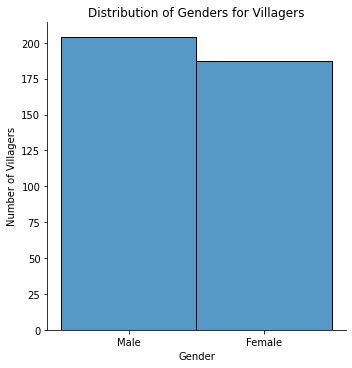

In [27]:

sns.displot(x=villagers.Gender)
plt.title('Distribution of Genders for Villagers')
plt.ylabel('Number of Villagers')
plt.show()

In [28]:
# What about our found_objects dataframe?

found_object_prices.Sell_price.max()

15000

In [29]:
found_object_prices.Sell_price.min()

10

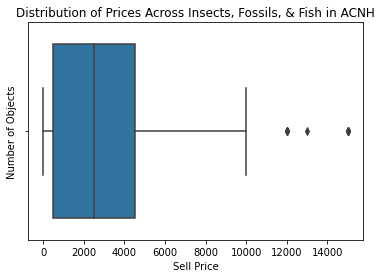

In [30]:
sns.boxplot(x='Sell_price', data=found_object_prices)
plt.title('Distribution of Prices Across Insects, Fossils, & Fish in ACNH')
plt.xlabel('Sell Price')
plt.ylabel('Number of Objects')

plt.show()

We have a few possible dataframes to look at with regards to diy items: diy_recipes, diy_materials, mat_counts and diy_store.
diy_recipes contains information regarding the diy cards that players can find throughout the island whereas 
diy_store contains items that can be both purchased from Nook's Cranny and DIY'd.

In [31]:
# The diy_recipes dataframe will tell us how many items can be diy'd

len(diy_recipes.Name)

595

In [32]:
# The diy_store will tell us how many items can be both crafted and bought from the island's store

len(diy_store.Object)

10

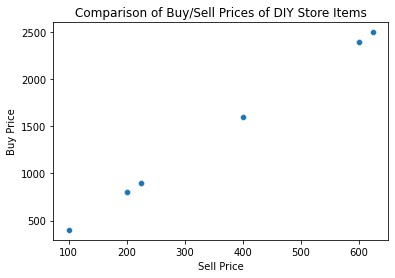

In [33]:
# How do the buy and sell prices compare of items in the diy_store dataframe?

sns.scatterplot(x='Sell_price', y='Buy_price', data=diy_store)
plt.title("Comparison of Buy/Sell Prices of DIY Store Items")
plt.ylabel('Buy Price')
plt.xlabel('Sell Price')

plt.show()

In [34]:
# The diy_recipes dataframe can tell us about where the diy cards players receive come from on the island

diy_recipes.Source.nunique()

56

In [35]:
diy_recipes.Source.value_counts()

Balloons                          76
All Villagers                     52
Celeste                           47
Jock villagers                    34
Lazy villagers                    32
Smug villagers                    32
Normal villagers                  32
Big Sister villagers              31
Snooty villagers                  30
Peppy villagers                   30
Cranky villagers                  29
Nook Miles Exchange               29
Egg bottle; Egg balloon           15
Snowboy                           15
Test Your DIY Skills               7
DIY for Beginners                  6
Tom Nook; Cranky villagers         6
Wildest Dreams DIY                 6
Tom Nook                           6
Pretty Good Tools Recipes          6
Balloons; Isabelle                 5
Tom Nook; Peppy villagers          5
Tom Nook; Big sister villagers     4
Tom Nook; Snooty villagers         3
Tom Nook; Lazy villagers           3
Zipper                             3
Tom Nook; Nook's Cranny            3
F

In [36]:
# That's a lot of values under 15. It would make for a potentially confusing visualization. 
# If we group some of the values together we could be left with a much neater looking display.

source_labels = ['Balloons', 'All Villagers', 'Celeste', 'Jock Villagers', 'Normal Villagers', 'Lazy Villagers', 
    'Smug Villagers', 'Big Sister Villagers', 'Peppy Villagers', 'Snooty Villagers', 'Nook Miles Exchange', 
    'Cranky Villagers', 'Other']

proportions = [0.12, 0.09, 0.08, 0.06, 0.053, 0.053, 0.053, 0.052, 0.050, 0.050, 0.048, 0.048, 0.243]

colors = sns.color_palette('colorblind')


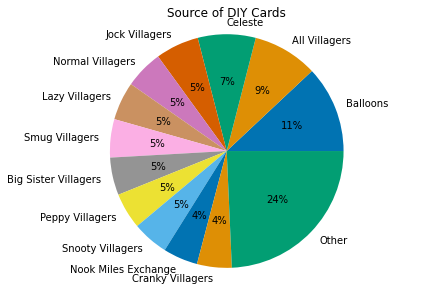

In [37]:

plt.pie(proportions, labels=source_labels, colors=colors, autopct='%d%%')
plt.axis('Equal')

plt.tight_layout()
plt.title('Source of DIY Cards')
plt.show()

In [39]:
mat_counts.sort_values(by='Total', ascending=False)

,Item,Total
34,iron nugget,101
76,wood,95
66,star fragment,53
65,softwood,49
33,hardwood,49
...,...,...
121,wedding flower stand,1
122,weed,1
125,wobbling Zipper toy,1
133,log stool,1


Text(0.5, 1.0, 'Most Frequently Used Materials in DIY Recipes')

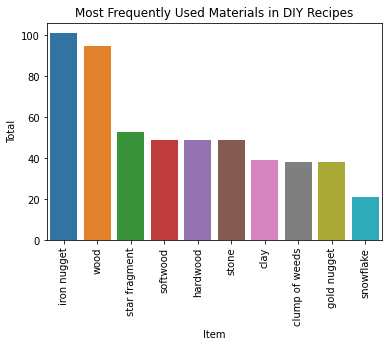

In [43]:
sns.barplot(x=mat_counts.Item.iloc[:10], y=mat_counts.Total.iloc[:10])
plt.tick_params('x', rotation=90)
plt.title('Most Frequently Used Materials in DIY Recipes')

# Conclusions

1. There are more male villagers available to move onto a player's island than female villagers, but not by a significant amount.
    * They can have a combination of 8 distinct personalities as well as 6 different hobbies.
    * Villagers can also be one of 35 species!
2. The highest selling item that a player can find on the island is worth 15000 bells, while the lowest goes for 10.
3. There are 595 DIY recipes that a player can learn.
    * Of those there are only 10 where the completed item can also be purchased in Nook's Cranny for a price of 2500 bells! If the player chose to instead craft said item and then sell it they could receive 600 bells. 
4. Most DIY recipes are obtained from various sources throughout the island such as "Shooting 300 balloons" or "Helping Gulliver 30 times", however the player can obtain about 11% of DIY recipes just from the villagers that live on the island.
5. The single most useful item that can be found on the island and used in DIY recipes is the iron nugget, follow closely by wood.
